In [96]:
with open('boostsrl/results_genetic/auc_genetic.txt') as f:
    auc = f.readlines()

In [97]:
auc = [i.replace('\n', '') for i in auc]

values = []
label = []
for i in range(0, len(auc)-6):
    if '---' not in auc[i] or 'Area' not in auc[i]:
        res = auc[i].split(' ')
        values.append(float(res[0]))
        label.append(int(res[1]))

In [98]:
tp = [label[0]]
fp = [1-tp[0]]
fn = [sum(label[1:])]
tn = [len(label[1:]) - fn[0]]

for i in range(1, len(label)):
    tp.append(tp[i-1] + label[i])
    fp.append(i-tp[i])
    fn.append(sum(label[i+1:]))
    tn.append(len(label[i+1:]) - fn[i])
    

In [99]:
tp[0], values[0] > values[-1], label[0]

(0, True, 0)

In [100]:
precision = []
recall = []

for i in range(0, len(tp)):
    precision.append(tp[i]/(tp[i]+fp[i]))
    recall.append(tp[i]/(tp[i]+fn[i]))

In [101]:
recall[-1]

1.0

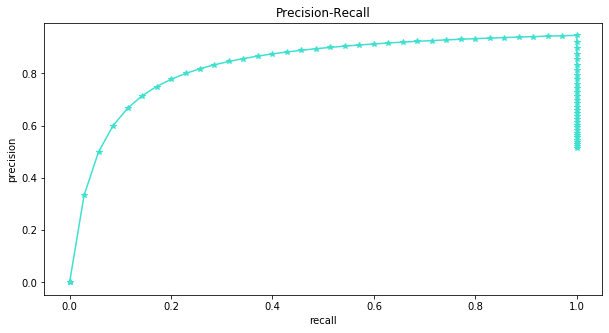

In [124]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, marker='*', color='turquoise')
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision-Recall")
# plt.rcParams["figure.figsize"] = (10,5)
# plt.show()
plt.savefig("test3.png", dpi = (200))

In [103]:
import numpy as np
mrec = np.concatenate(([0.], recall, [1.]))
mpre = np.concatenate(([0.], precision, [0.]))

In [104]:
# compute the precision envelope
for i in range(mpre.size - 1, 0, -1):
    mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

In [105]:
i = np.where(mrec[1:] != mrec[:-1])[0]

In [106]:
pr_auc = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])

In [107]:
pr_auc

0.945945945945946